In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [51]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20
}

In [66]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.3e-3, y_width=.3e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=2e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=2e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=2e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=0, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=2e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=100e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.05, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=slit.z - .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, downstream_YAG,IP, crystal1,crystal2,crystal3,crystal4, slit,crl1,crl2]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal1.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 359.9273925318916 microns
FWHM in y: 359.9273925318916 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4159771378605495
5.4159771378605495
b 1.00
b 1.64
b 1.00
b 1.64
0.6102211874545929
24.86894226347203
14.869889912414962
(array([0., 0., 0.]), array([0.33987292, 0.        , 0.94047137]))
1.3620401788281523e-05


mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.06
zy: 360.01
drift5
zx: 134.16
zy: 360.11
c3
zx: -134.16
zy: 360.11
drift6
zx: -134.15
zy: 360.12
c4
zx: 49.96
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54


<IPython.core.display.Javascript object>


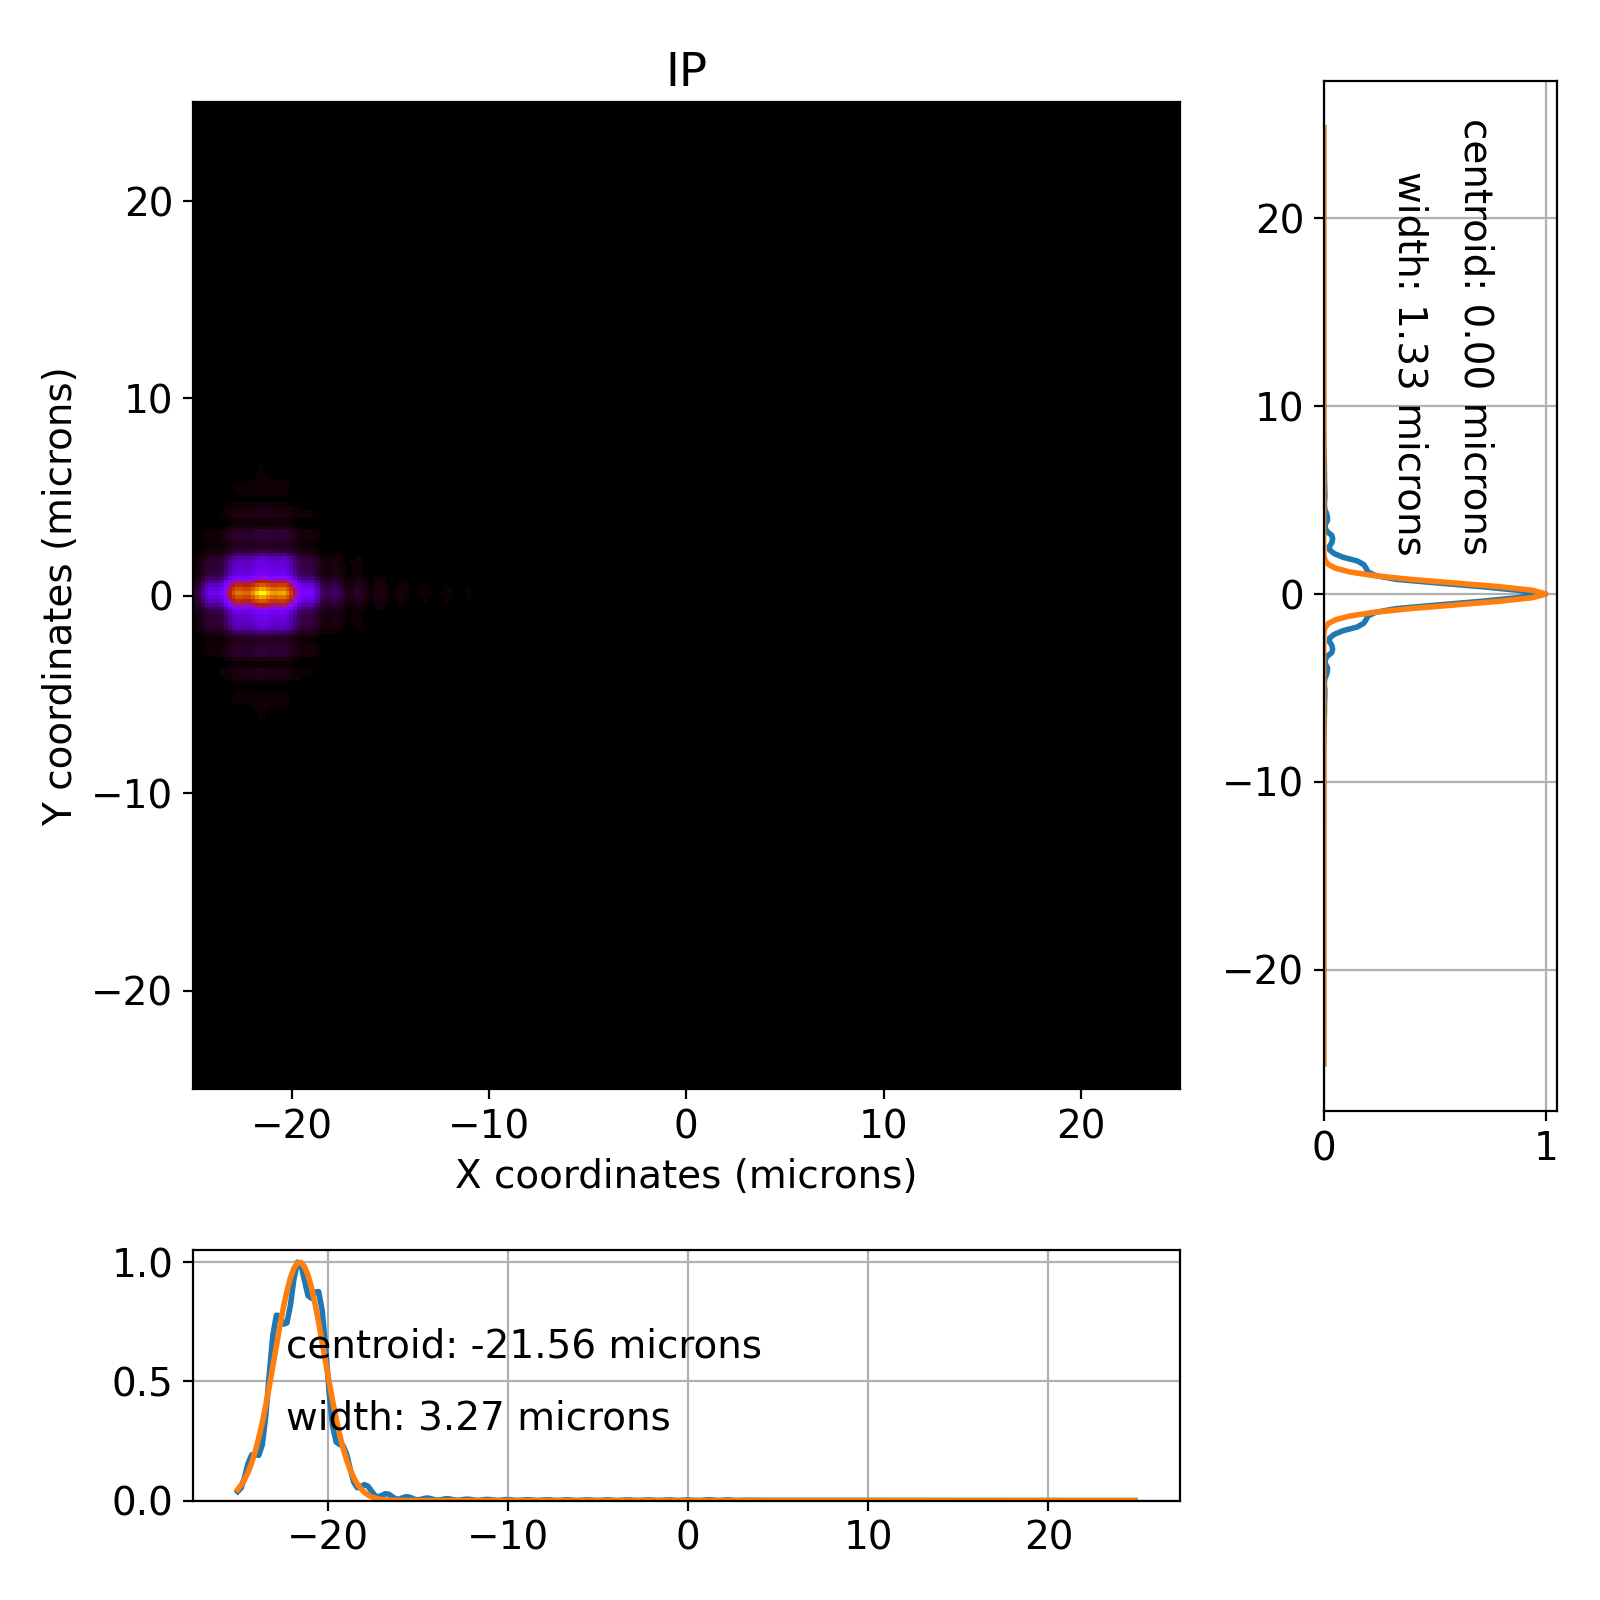

<IPython.core.display.Javascript object>


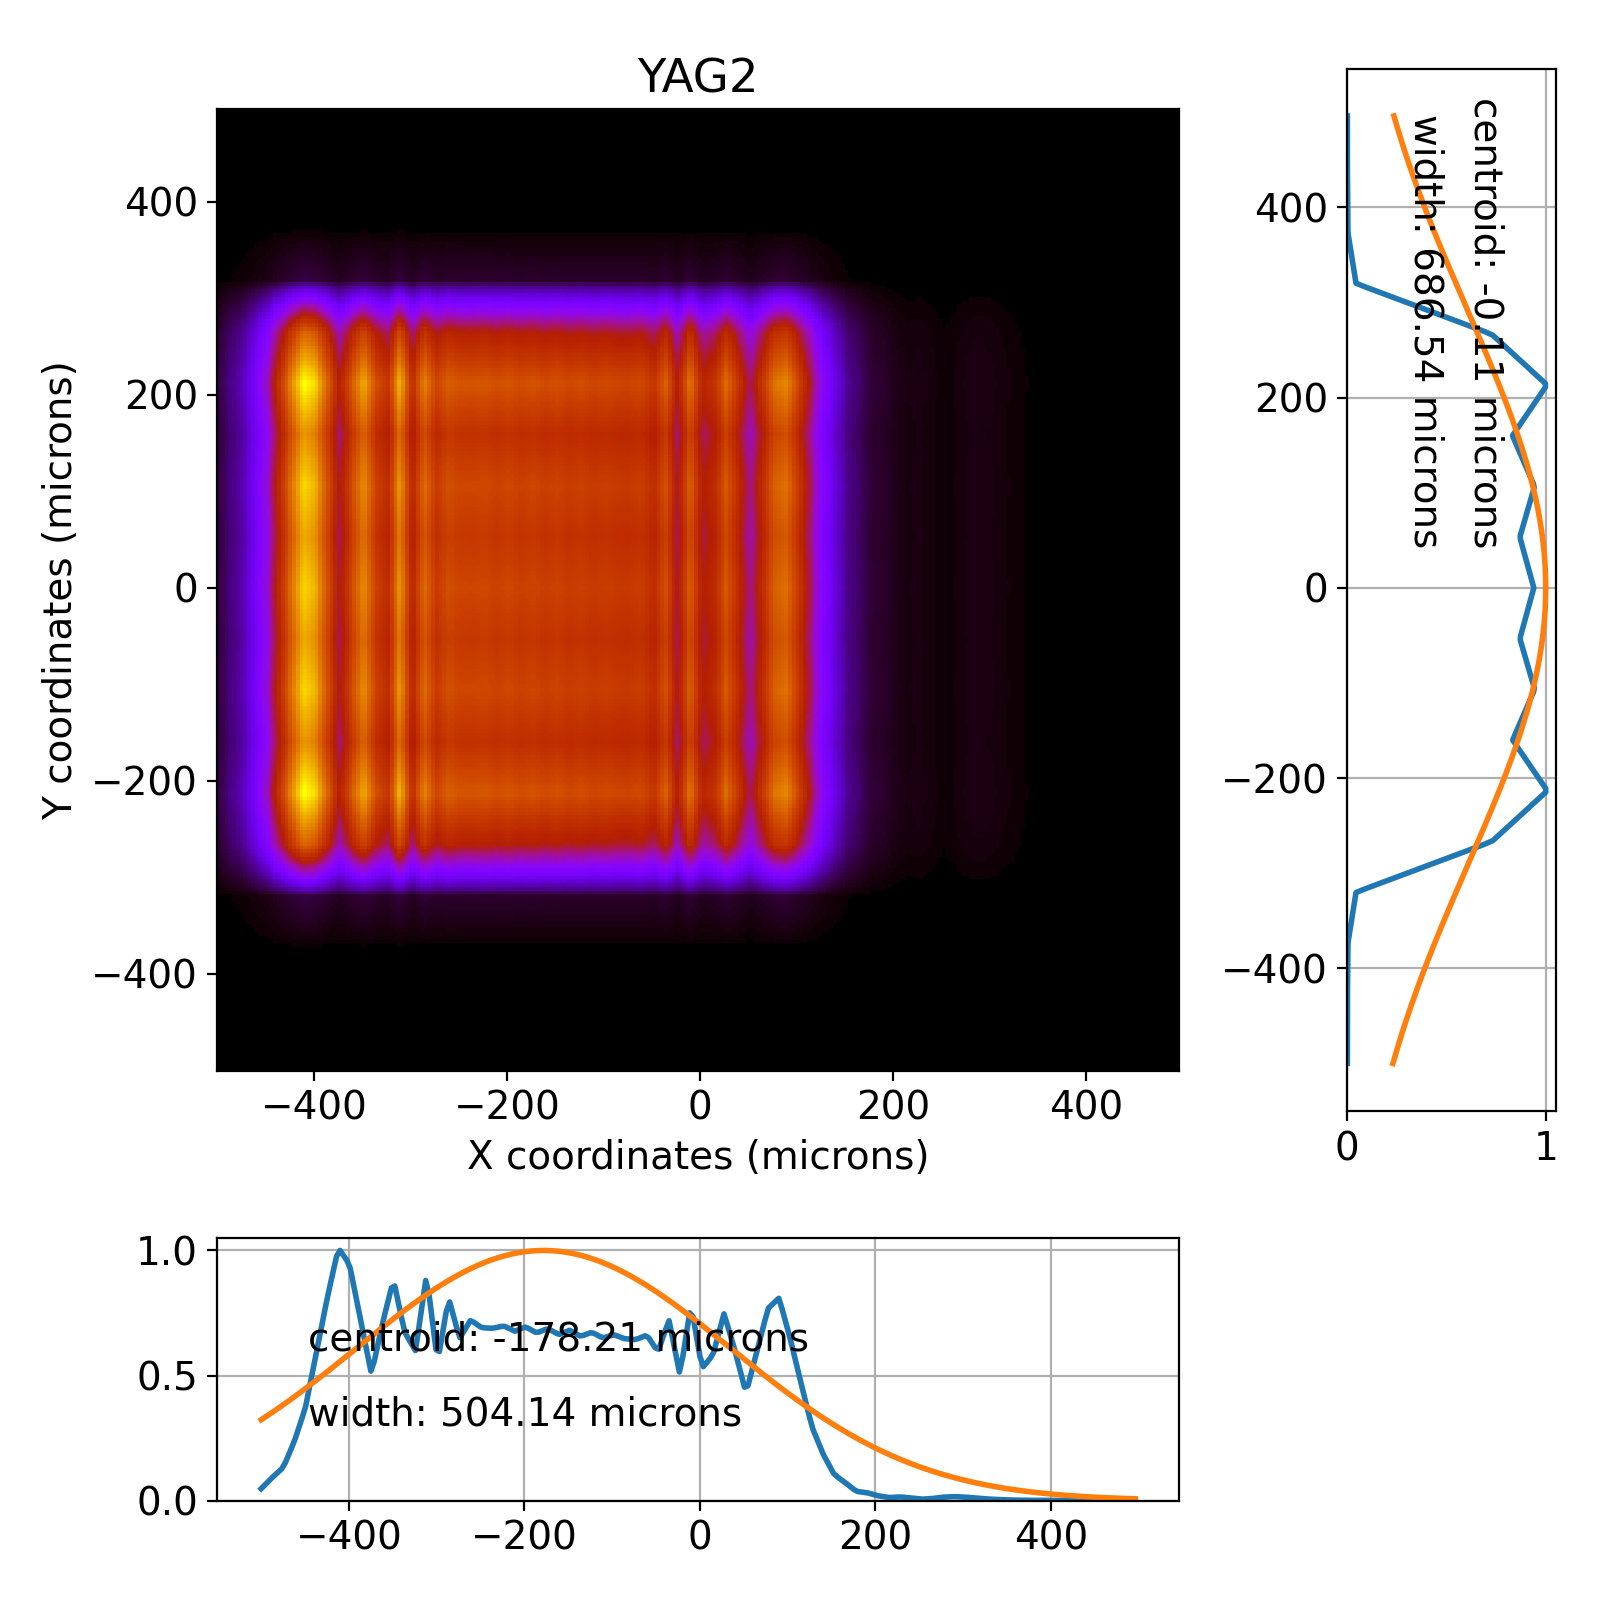

<IPython.core.display.Javascript object>


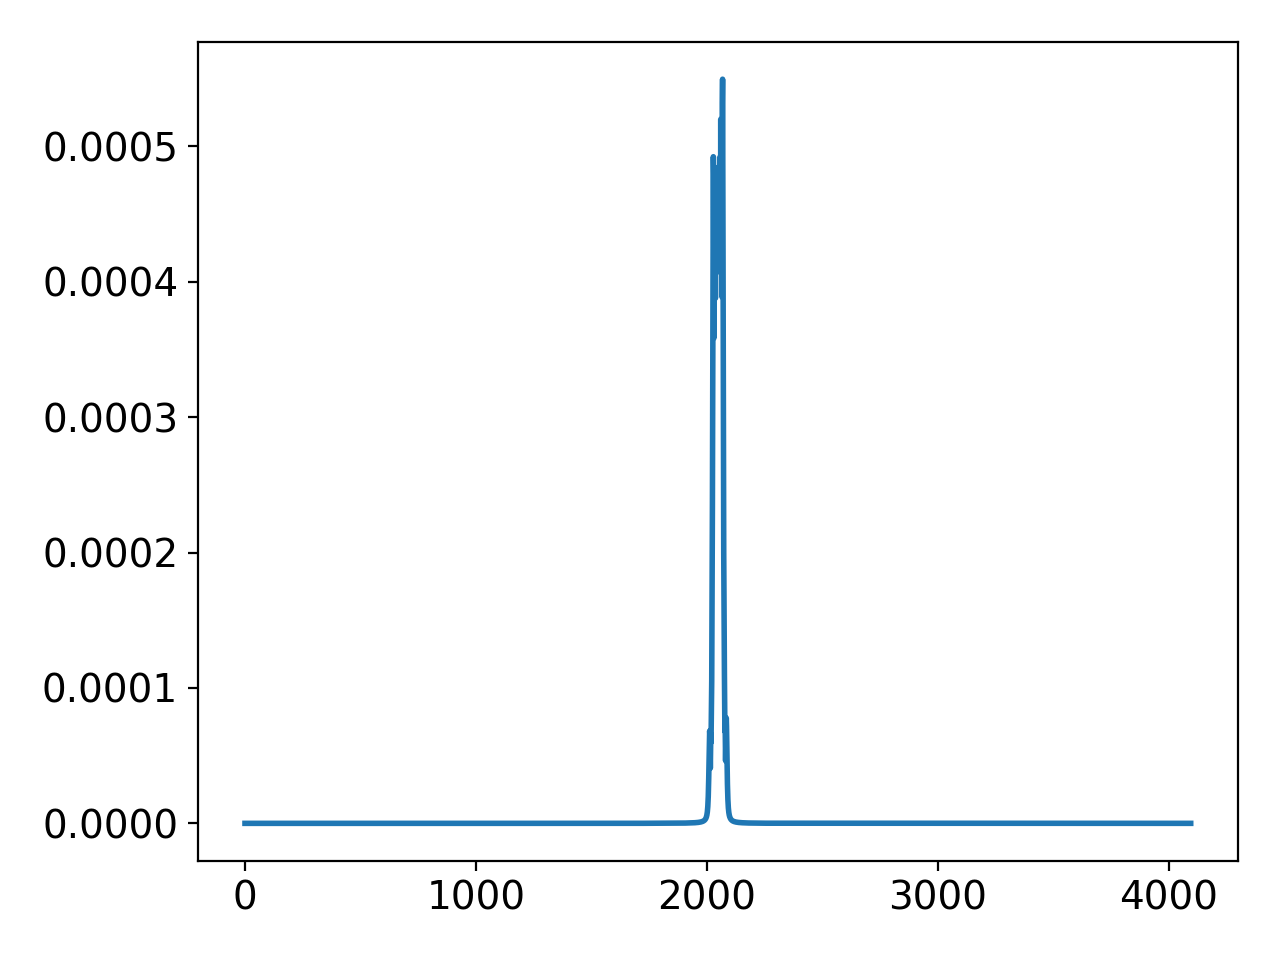

In [67]:
b2 = XPP.propagate_beamline(b1)
# XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [68]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=500)

In [69]:
pulse_test.propagate(beamline=XPP, screen_names=['IP', 'YAG2'])

FWHM in x: 359.9976963997878 microns
FWHM in y: 359.9976963997878 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414916889636518
5.414916889636518
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.04
zy: 360.01
drift5
zx: 134.14
zy: 360.11
c3
zx: -134.14
zy: 360.11
drift6
zx: -134.13
zy: 360.12
c4
zx: 49.94
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.55
YAG2
zx: 5.53
zy: 5.55
FWHM in x: 359.9973810742

x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.55
YAG2
zx: 5.53
zy: 5.55
FWHM in x: 359.99391253028017 microns
FWHM in y: 359.99391253028017 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414973943352609
5.414973943352609
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.04
zy: 360.01
drift5
zx: 134.14
zy: 360.11
c3
zx: -134.14
zy: 360.11
drift6
zx: -134.13
zy: 360.12
c4
zx: 49.94
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y rem

zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.55
YAG2
zx: 5.53
zy: 5.55
FWHM in x: 359.99044405336116 microns
FWHM in y: 359.99044405336116 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4150262425923605
5.4150262425923605
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.04
zy: 360.01
drift5
zx: 134.14
zy: 360.11
c3
zx: -134.14
zy: 360.11
drift6
zx: -134.13
zy: 360.12
c4
zx: 49.94
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
I

zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.04
zy: 360.01
drift5
zx: 134.14
zy: 360.11
c3
zx: -134.14
zy: 360.11
drift6
zx: -134.13
zy: 360.12
c4
zx: 49.94
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9866603368616 microns
FWHM in y: 359.9866603368616 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415083296308451
5.415083296308451
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
ent

zx: -134.14
zy: 360.11
drift6
zx: -134.13
zy: 360.12
c4
zx: 49.94
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.98319200019574 microns
FWHM in y: 359.98319200019574 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4151355955482
5.4151355955482
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.04
zy: 360.01
drift5
zx: 134.14
zy: 360.11
c3
zx: -134.14
zy: 360.11
drif

zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9797237306044 microns
FWHM in y: 359.9797237306044 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415187894787952
5.415187894787952
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.04
zy: 360.01
drift5
zx: 134.14
zy: 360.11
c3
zx: -134.14
zy: 360.11
drift6
zx: -134.13
zy: 360.12
c4
zx: 49.94
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx

zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.04
zy: 360.01
drift5
zx: 134.14
zy: 360.11
c3
zx: -134.14
zy: 360.11
drift6
zx: -134.13
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.97625552808563 microns
FWHM in y: 359.97625552808563 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415240194027703
5.415240194027703
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
d

zx: -134.13
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.97278739263766 microns
FWHM in y: 359.97278739263766 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415292493267452
5.415292493267452
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11
drift6
zx: -134.13
zy: 360.12


FWHM in x: 359.9693193242582 microns
FWHM in y: 359.9693193242582 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415344792507204
5.415344792507204
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11
drift6
zx: -134.13
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9690040486

zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9655360534246 microns
FWHM in y: 359.9655360534246 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415401846223295
5.415401846223295
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drif

zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.97
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9617528624035 microns
FWHM in y: 359.9617528624035 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415458899939385
5.415458899939385
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
dr

zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.95860026418524 microns
FWHM in y: 359.95860026418524 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415506444702796
5.415506444702796
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
d

mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.95513247015765 microns
FWHM in y: 359.95513247015765 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4155587439425465
5.4155587439425465
mr1l0
zx: 110.00
zy: 

zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9519799883241 microns
FWHM in y: 359.9519799883241 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415606288705956
5.415606288705956
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift

zx: -134.15
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.94851232231645 microns
FWHM in y: 359.94851232231645 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415658587945705
5.415658587945705
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11


zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.05
zy: 360.01
drift5
zx: 134.15
zy: 360.11
c3
zx: -134.15
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.94504472336354 microns
FWHM in y: 359.94504472336354 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415710887185457
5.415710887185457
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
d

zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.06
zy: 360.01
drift5
zx: 134.16
zy: 360.11
c3
zx: -134.16
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.94157719146403 microns
FWHM in y: 359.94157719146403 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415763186425207
5.415763186425207
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00


zx: 134.06
zy: 360.01
drift5
zx: 134.16
zy: 360.11
c3
zx: -134.16
zy: 360.11
drift6
zx: -134.14
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.93842494792204 microns
FWHM in y: 359.93842494792204 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415810731188617
5.415810731188617
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.06
zy: 360.01
d

zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9355879761124 microns
FWHM in y: 359.9355879761124 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415853521475686
5.415853521475686
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.06
zy: 360.01
drift5
zx: 134.16
zy: 360.11
c3
zx: -134.16
zy: 360.11
drift6
zx: -134.15
zy: 360.12
c4
zx: 49.95
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit


zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9321206270752 microns
FWHM in y: 359.9321206270752 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415905820715436
5.415905820715436
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.06
zy: 360.01
drift5
zx: 134.16
zy: 360.11
c3
zx: -134.16
zy: 360.11
drift6
zx: -134.15
zy: 360.12
c4
zx: 49.96
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit


x stays unfocused
y remains focused
zx: 49.98
zy: 360.15
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.15
crly
focal length: 0.93
zx: -0.94
zy: -0.93
drift8
zx: -0.94
zy: -0.93
YAG1
zx: -0.94
zy: -0.93
drift9
zx: -0.94
zy: -0.93
drift10
zx: -0.89
zy: -0.88
slit
zx: -0.89
zy: -0.88
drift11
zx: -0.04
zy: -0.03
IP
zx: -0.04
zy: -0.03
drift12
zx: 5.53
zy: 5.54
YAG2
zx: 5.53
zy: 5.54
FWHM in x: 359.9289685497672 microns
FWHM in y: 359.9289685497672 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415953365478845
5.415953365478845
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
zx: 359.00
zy: 359.00
entrance
zx: 359.00
zy: 359.00
drift3
zx: 360.00
zy: 360.00
c1
zx: -360.00
zy: 360.00
drift4
zx: -359.99
zy: 360.01
c2
zx: 134.06
zy: 360.01
drift5
zx: 134.16
zy: 360.11
c3
zx: -134.16
zy: 360.11
drift6
zx: -134.15
zy: 360.12
c4
zx: 49.96
zy: 360.12
drift7
x stays unfocused
y becomes focused
x stays unfocused
y remai

In [63]:
(130-86)/50

0.88

<IPython.core.display.Javascript object>


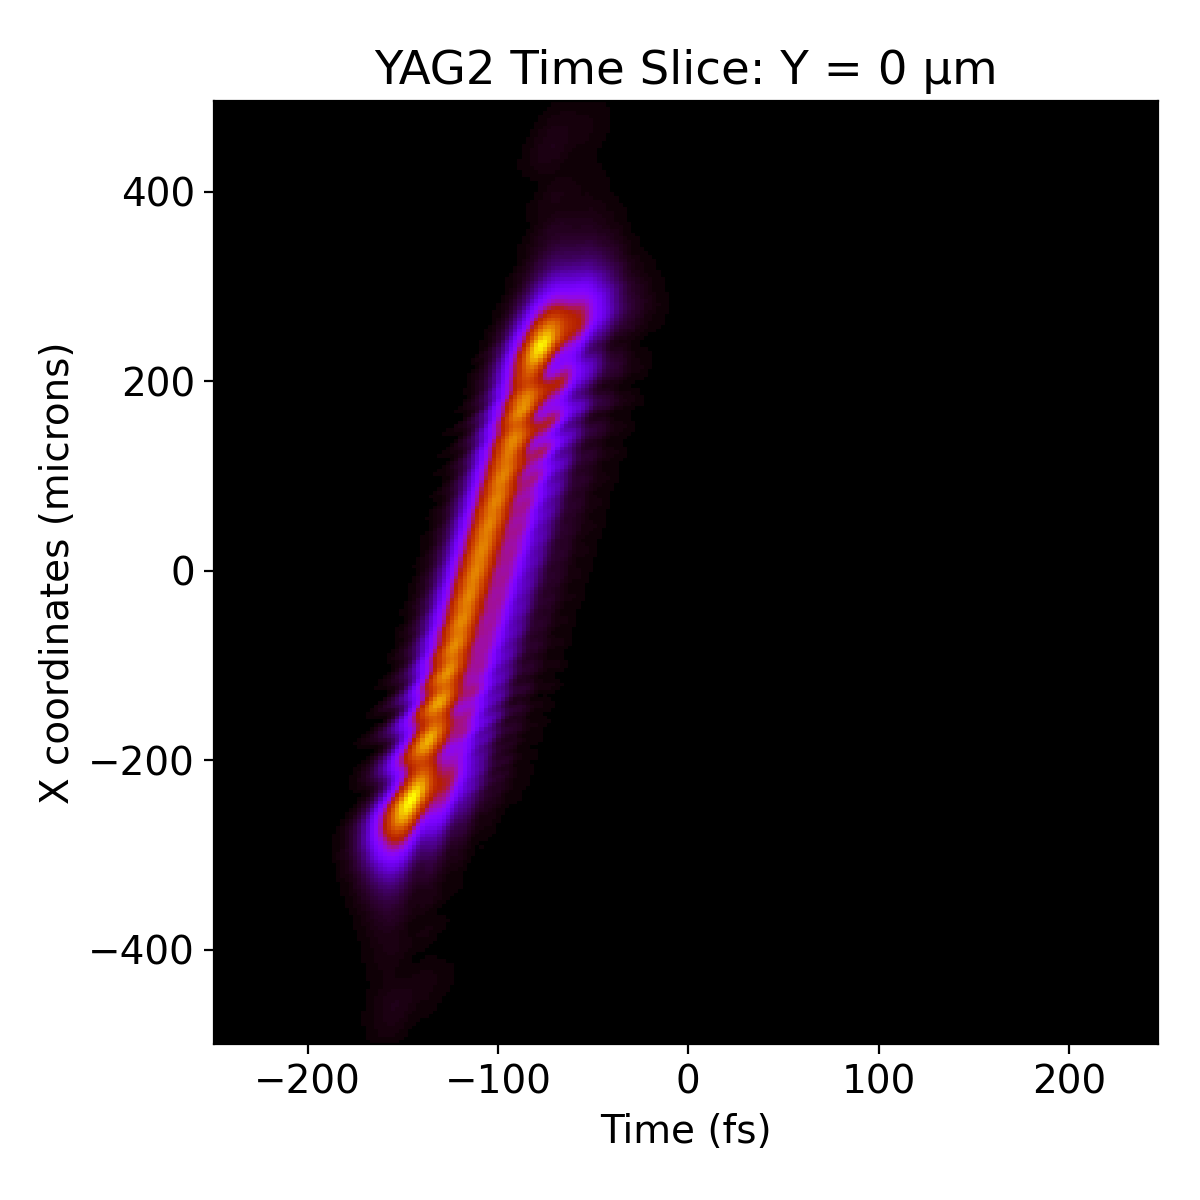

128


<IPython.core.display.Javascript object>


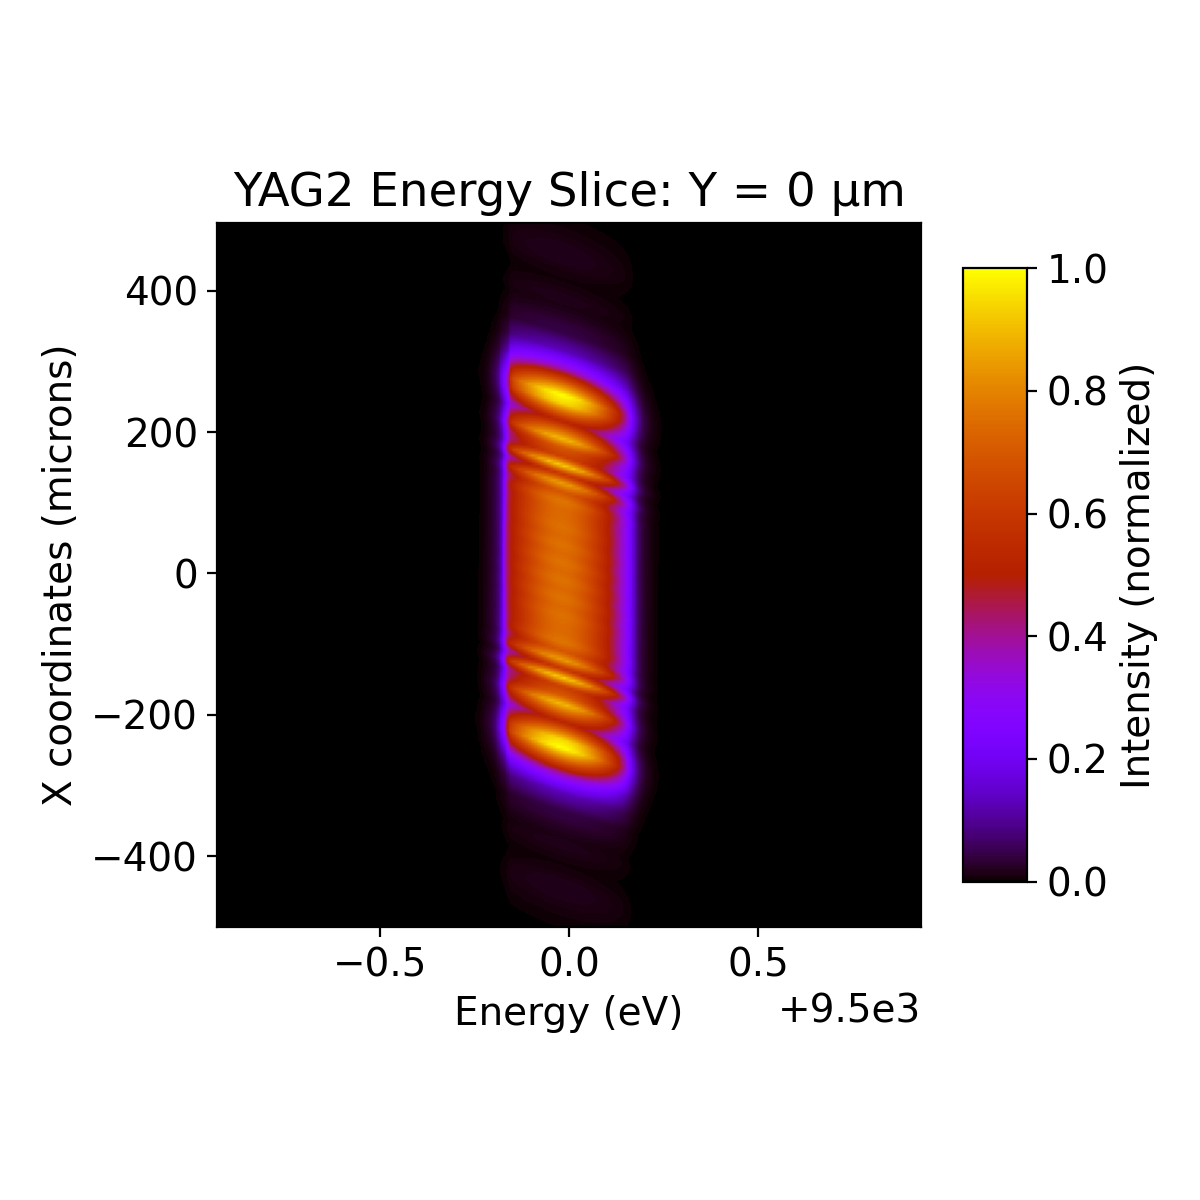

<IPython.core.display.Javascript object>


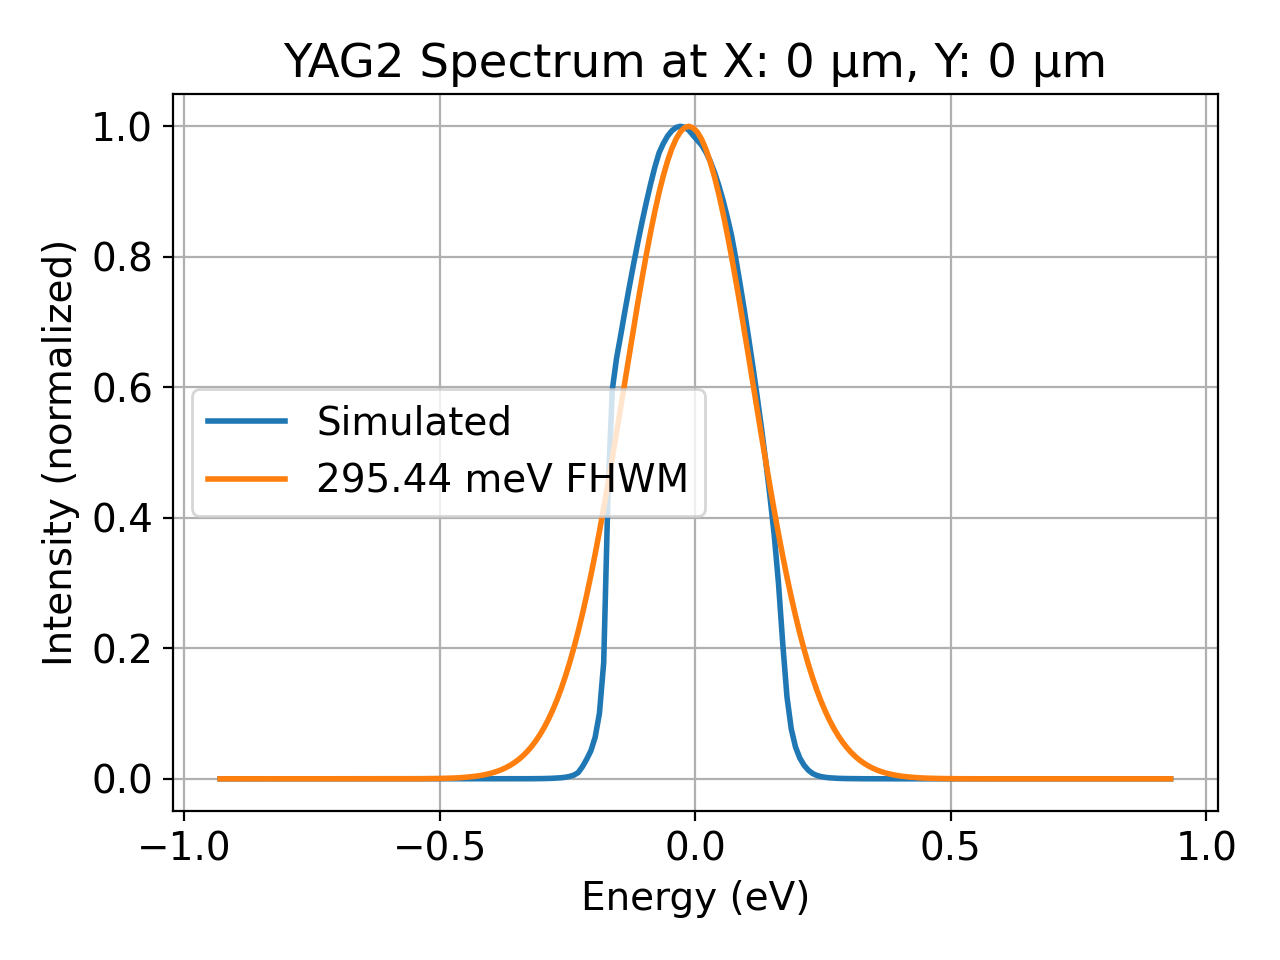

<IPython.core.display.Javascript object>


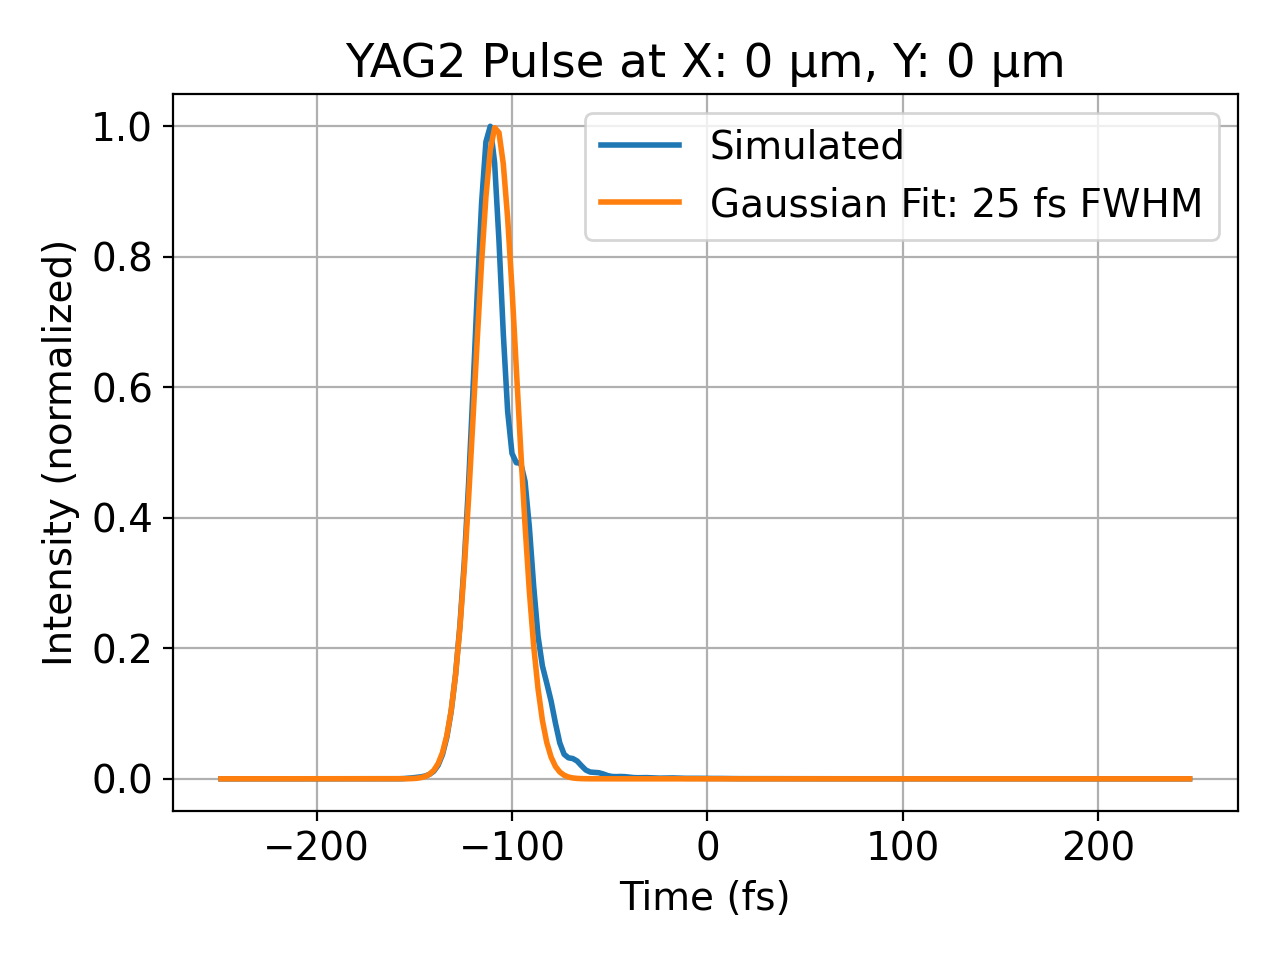

<IPython.core.display.Javascript object>


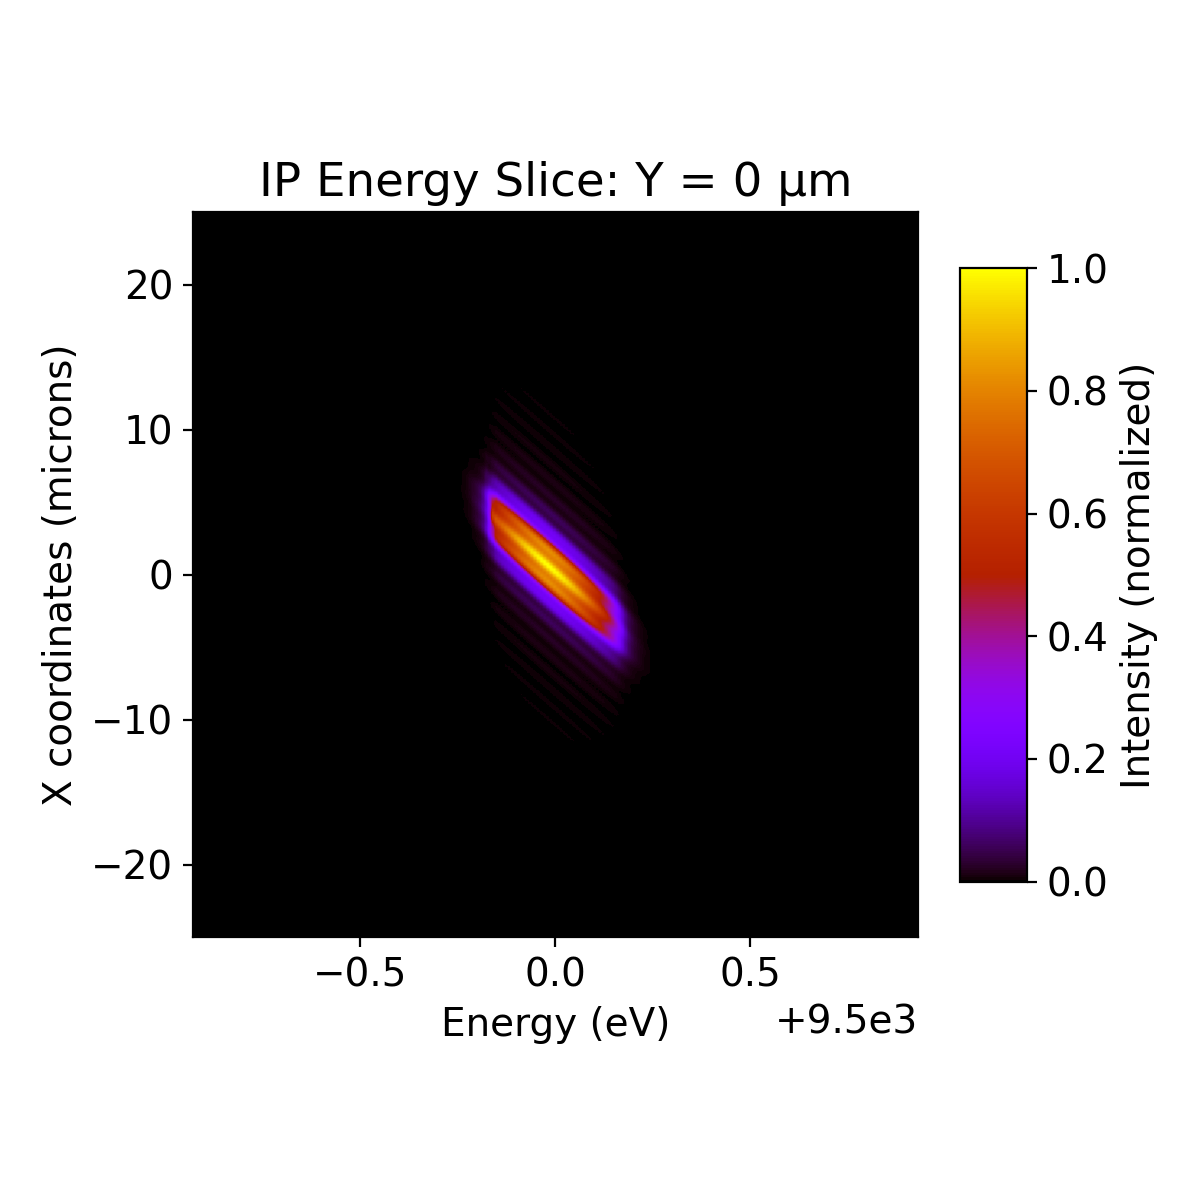

<IPython.core.display.Javascript object>


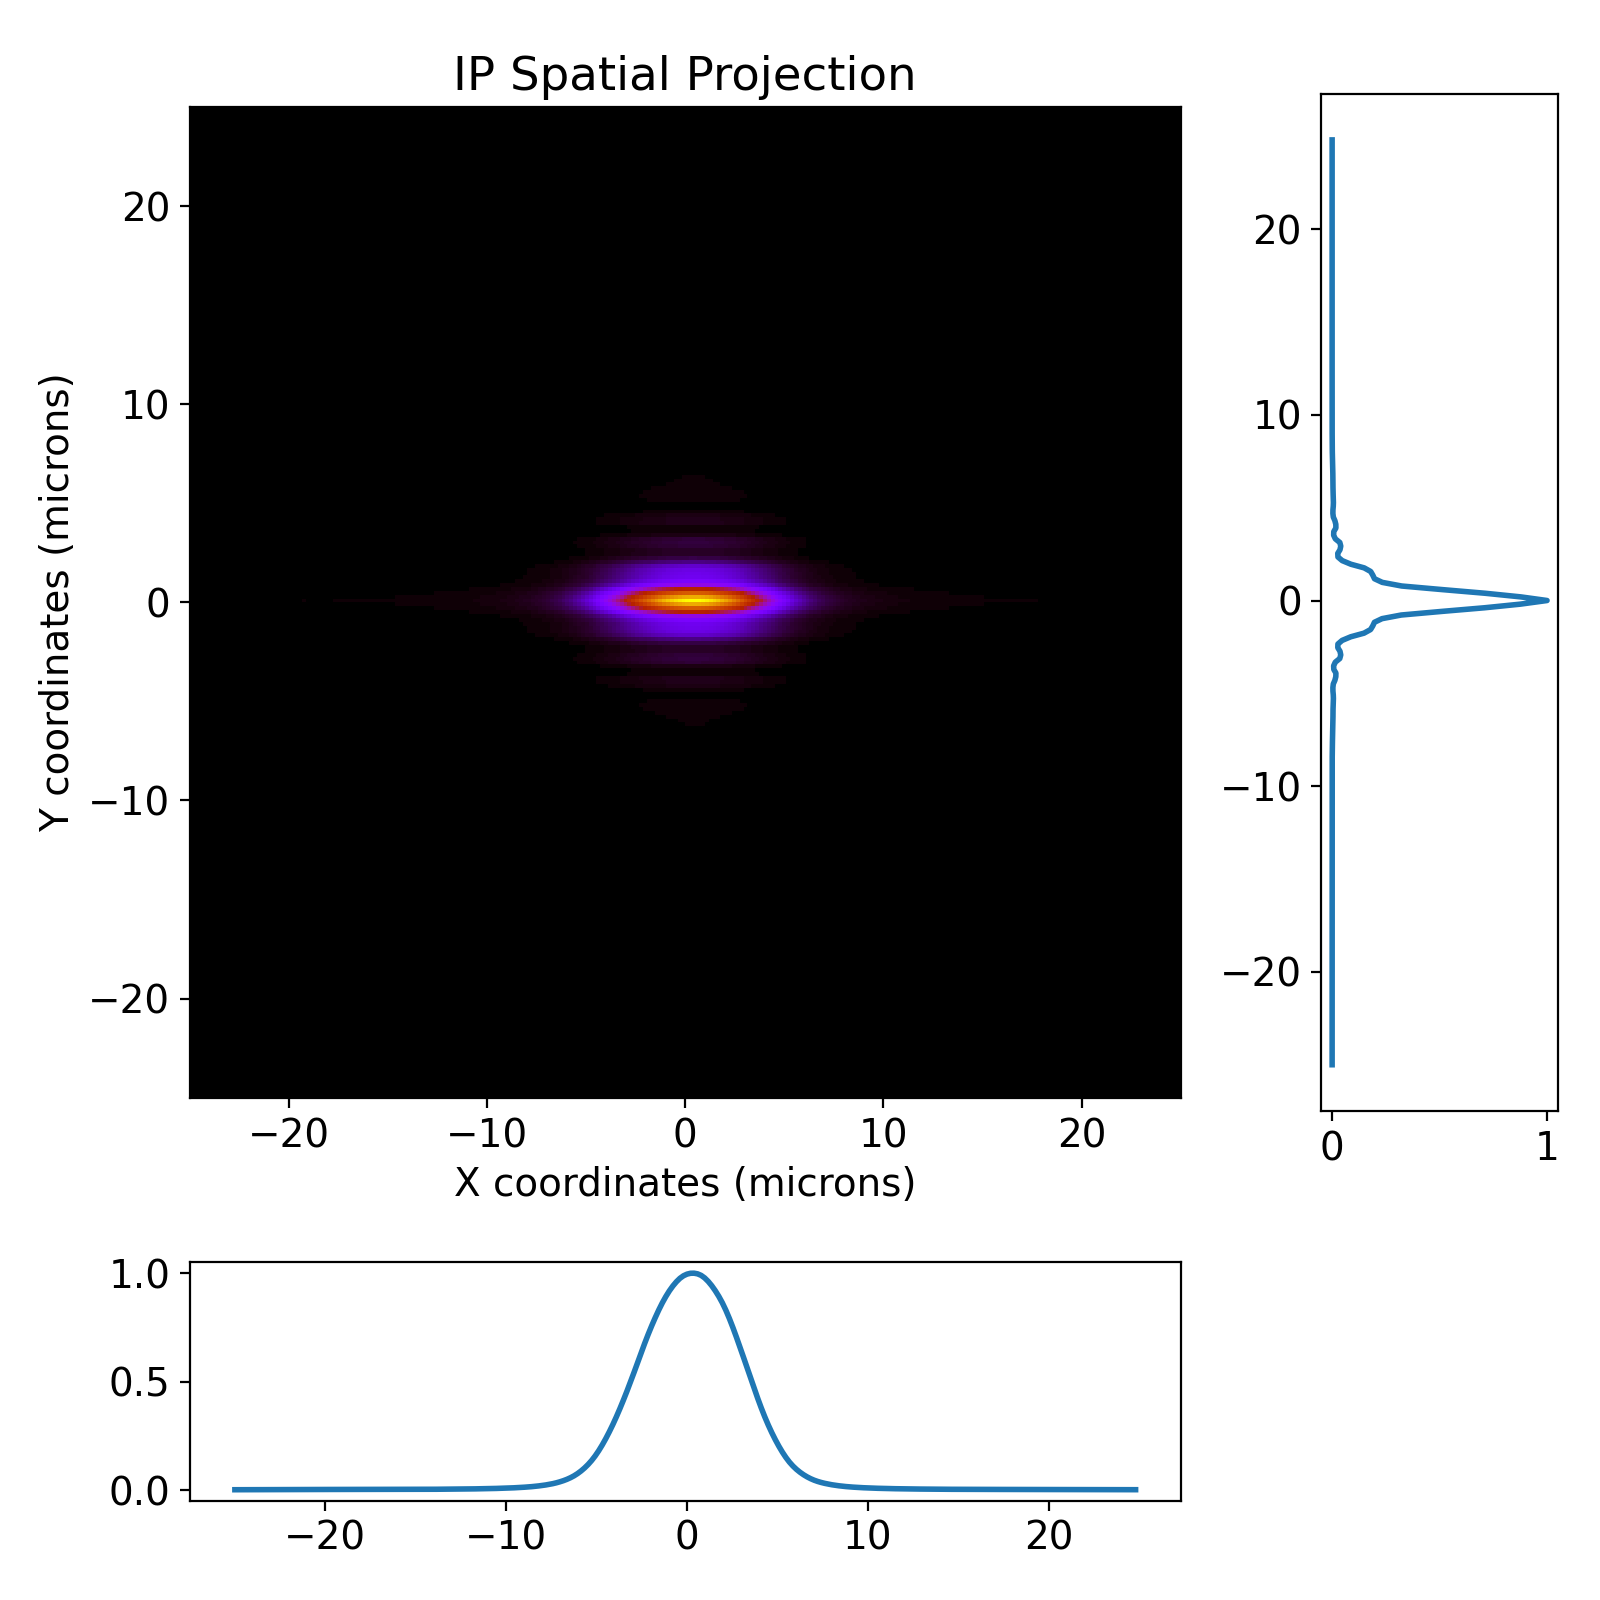

<IPython.core.display.Javascript object>


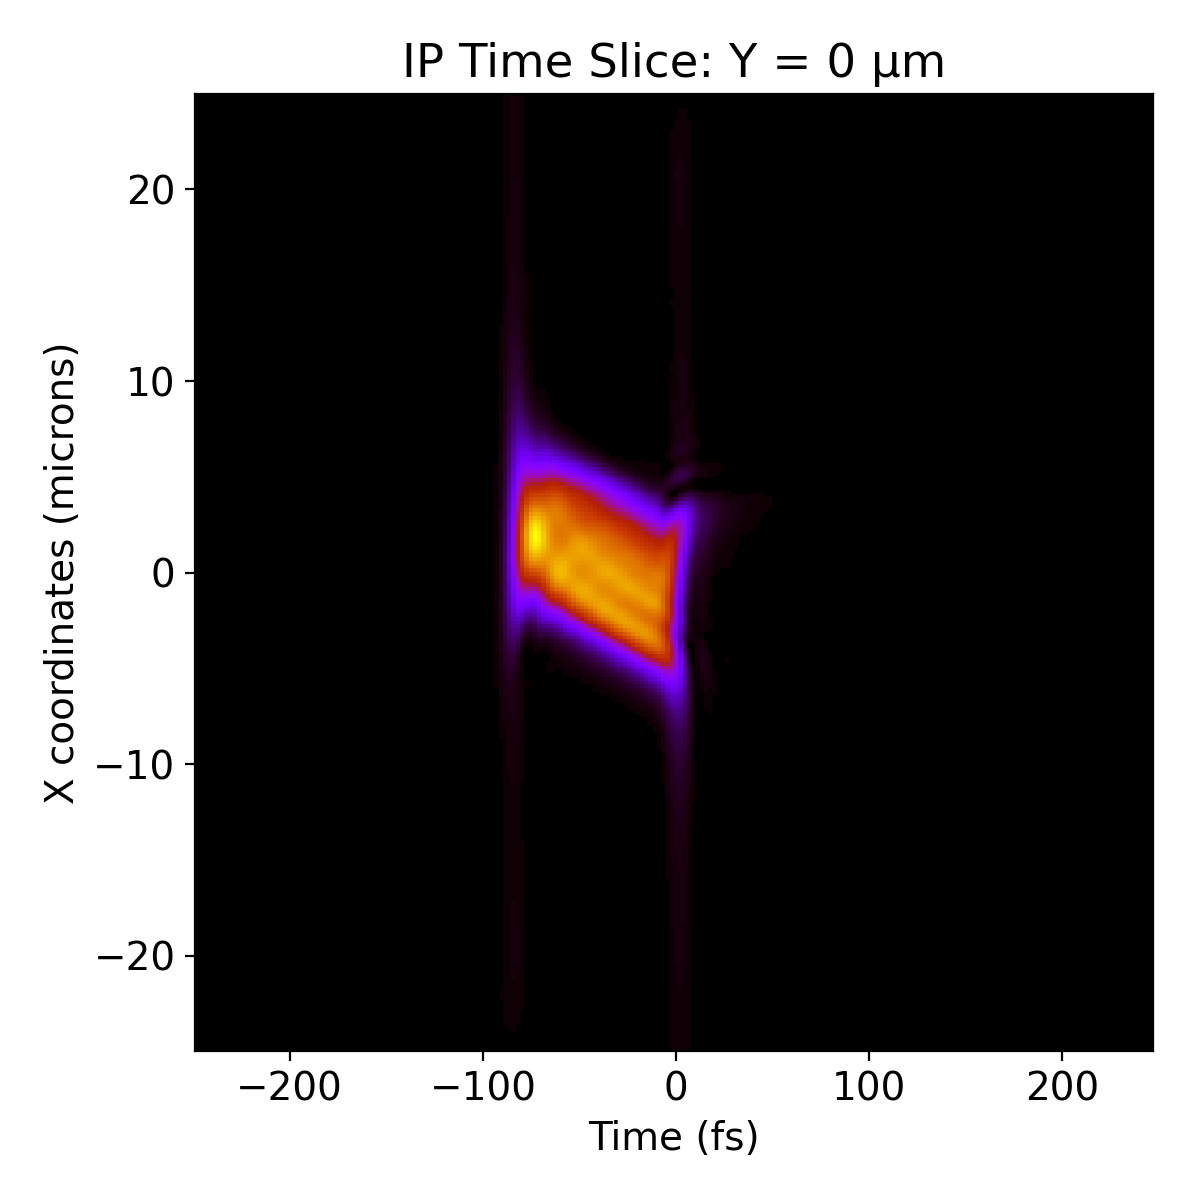

128


In [70]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('IP')
pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


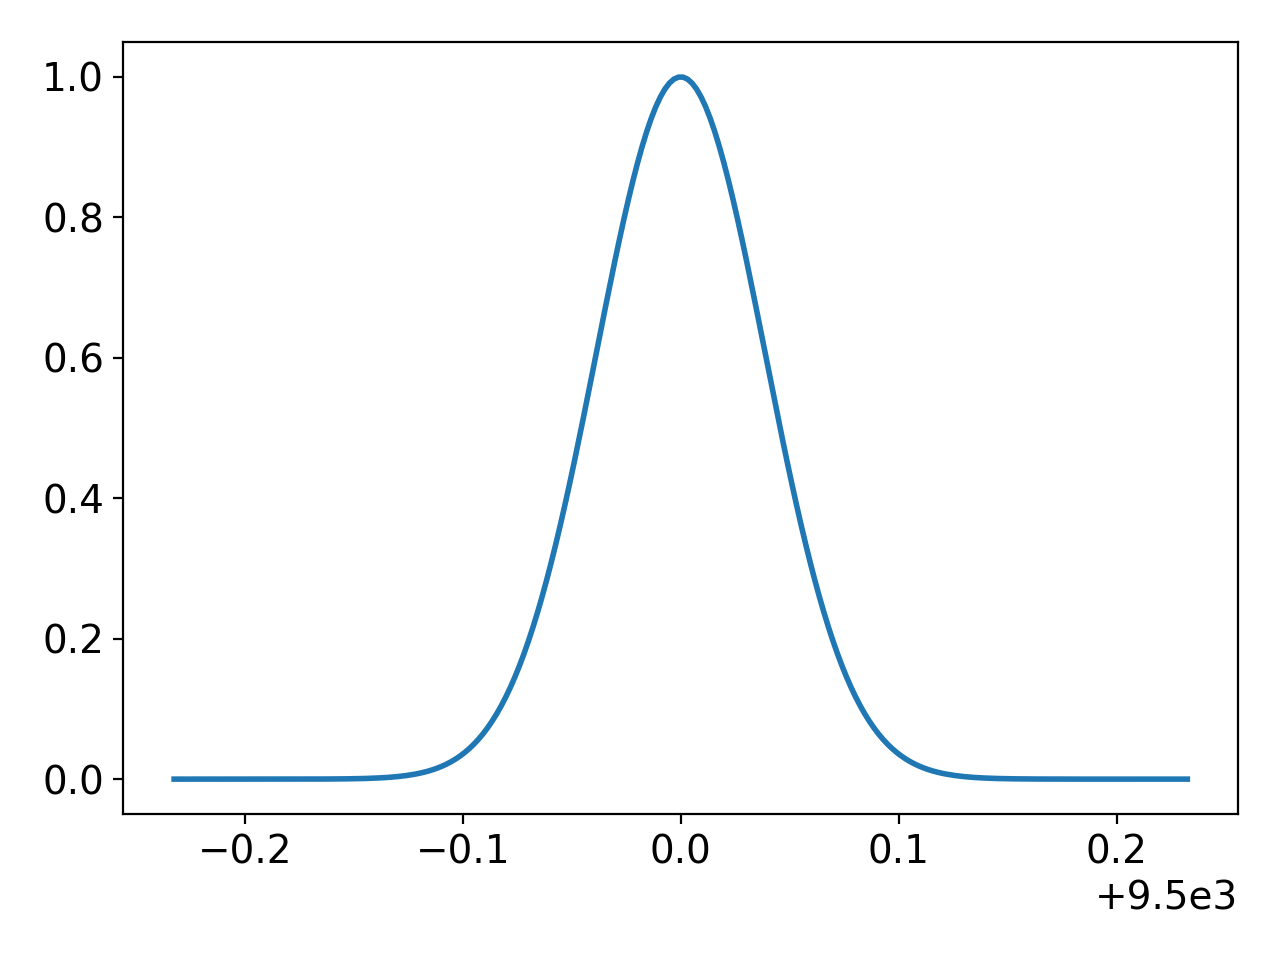

In [24]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8